<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Load-cleaned-data-from-last-lecture" data-toc-modified-id="Load-cleaned-data-from-last-lecture-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load cleaned data from last lecture</a></span></li><li><span><a href="#Merge-Compustat-data-from-year-t,-with-CRSP-data-from-June,-year-t+1" data-toc-modified-id="Merge-Compustat-data-from-year-t,-with-CRSP-data-from-June,-year-t+1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Merge Compustat data from year t, with CRSP data from June, year t+1</a></span></li></ul></li><li><span><a href="#Figure-1" data-toc-modified-id="Figure-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 1</a></span></li><li><span><a href="#Create-asset-growth-(AG)-deciles" data-toc-modified-id="Create-asset-growth-(AG)-deciles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create asset-growth (AG) deciles</a></span></li><li><span><a href="#Summary-statistics-(Table-1)" data-toc-modified-id="Summary-statistics-(Table-1)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary statistics (Table 1)</a></span><ul class="toc-item"><li><span><a href="#Differences-between-high--and-low-AG-firms-(Spreads)" data-toc-modified-id="Differences-between-high--and-low-AG-firms-(Spreads)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Differences between high- and low-AG firms (Spreads)</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import statsmodels.api as sm
pd.options.display.max_rows = 20

# Data

## Load cleaned data from last lecture

In [2]:
# Load cleaned Compustat data from last lecture
comp_cgs = pd.read_pickle('../data/comp_cgs.zip')
comp_cgs.head(2)

,permno,year,dtdate,AG,L2AG,at,Leverage,ROA
2,10001,1987,1987-06-30,-0.038474,NaN,11.771,0.255432,0.026506
3,10001,1988,1988-06-30,-0.003058,-0.038474,11.735,0.244669,0.046187


In [3]:
# Load cleaned CRSP data (for table 1) from last lecture
crsp_table1 = pd.read_pickle('../data/crsp_cgs_table1.zip')
crsp_table1.head(2)

,permno,mdate,MV,BHRET6,BHRET36,FBHRET12
0,10000,1986-01,16.10,NaN,NaN,-0.907143
1,10000,1986-02,11.96,NaN,NaN,-0.875000


## Merge Compustat data from year t, with CRSP data from June, year t+1

In [4]:
# Keep only the CRSP data in Junes
crsp_table1 = crsp_table1.loc[crsp_table1['mdate'].dt.month==6, :].copy()
crsp_table1.head()

,permno,mdate,MV,BHRET6,BHRET36,FBHRET12
5,10000,1986-06,11.734594,NaN,NaN,NaN
22,10001,1986-06,6.033125,NaN,NaN,0.023884
34,10001,1987-06,5.822125,-0.131644,NaN,0.140535
46,10001,1988-06,6.200000,0.101995,NaN,0.199810
58,10001,1989-06,7.007000,0.136718,0.401108,0.468434


In [5]:
# Create year variable in CRSP data
crsp_table1['crsp_year'] = crsp_table1['mdate'].dt.year
crsp_table1.head()

,permno,mdate,MV,BHRET6,BHRET36,FBHRET12,crsp_year
5,10000,1986-06,11.734594,NaN,NaN,NaN,1986
22,10001,1986-06,6.033125,NaN,NaN,0.023884,1986
34,10001,1987-06,5.822125,-0.131644,NaN,0.140535,1987
46,10001,1988-06,6.200000,0.101995,NaN,0.199810,1988
58,10001,1989-06,7.007000,0.136718,0.401108,0.468434,1989


In [6]:
# Add 1 to the year in Compustat, so that accounting data in year t gets merged with returns from year t+1
comp_cgs['next_year'] = comp_cgs['year'] + 1

In [7]:
# Merge Compustat data from year t, with CRSP data from June, year t+1
andata = comp_cgs.merge(crsp_table1, how = 'inner',
                       left_on=['permno','next_year'],
                       right_on=['permno','crsp_year'])
andata.head()

,permno,year,dtdate,AG,L2AG,at,Leverage,ROA,next_year,mdate,MV,BHRET6,BHRET36,FBHRET12,crsp_year
0,10001,1987,1987-06-30,-0.038474,NaN,11.771,0.255432,0.026506,1988,1988-06,6.20000,0.101995,NaN,0.199810,1988
1,10001,1988,1988-06-30,-0.003058,-0.038474,11.735,0.244669,0.046187,1989,1989-06,7.00700,0.136718,0.401108,0.468434,1989
2,10001,1989,1989-06-30,0.582020,-0.003058,18.565,0.643801,0.065069,1990,1990-06,10.05225,-0.011095,1.009441,0.140009,1990
3,10001,1990,1990-06-30,0.017021,0.582020,18.881,0.396984,0.059901,1991,1991-06,11.26650,0.137278,1.008516,0.175542,1991
4,10001,1991,1991-06-30,0.038028,0.017021,19.599,0.380012,0.054748,1992,1992-06,12.63125,-0.168310,0.967890,0.466211,1992


In [8]:
andata.shape

(138949, 15)

# Figure 1

In [9]:
# Figure 1 from the paper
stats = andata.groupby('year')['AG'].agg(['mean','median','std'])
stats.head()

,mean,median,std
year,,,
1981,0.199033,0.103252,0.475381
1982,0.120197,0.053943,0.499522
1983,0.207523,0.075210,1.161871
1984,0.183763,0.092524,0.528180
1985,0.176959,0.070261,0.910085


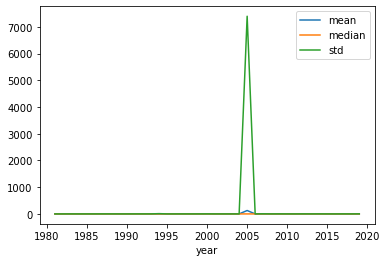

In [10]:
stats.plot();

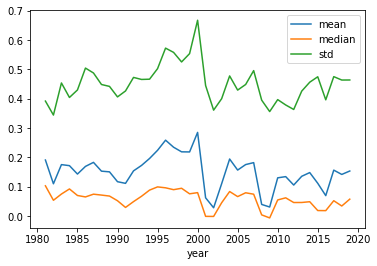

In [11]:
# Winsorize AG and try Figure 1 again
andata['AG_wins'] = andata['AG'].clip(lower=andata['AG'].quantile(0.01),
                                     upper=andata['AG'].quantile(0.99))

# Figure 1
andata.groupby('year')['AG_wins'].agg(['mean','median','std']).plot();

# Create asset-growth (AG) deciles

In [12]:
# Create AG deciles (every year)
andata['AG_decile'] = andata.groupby('year')['AG']\
                            .transform(lambda x: 
                                       pd.qcut(x, q=10,labels=range(1,11))
                                      )

In [13]:
# Check how many observations in each AG decile
andata['AG_decile'].value_counts(sort=False)

1     13910
2     13897
3     13885
4     13897
5     13894
6     13886
7     13890
8     13892
9     13890
10    13908
Name: AG_decile, dtype: int64

In [14]:
# Save for later use
andata[['permno','mdate','AG_decile']].copy().to_pickle('../data/cgs_AG_deciles.zip')

# Summary statistics (Table 1)

In [25]:
# Restrict the sample period to the one in the paper
andata = andata.loc[ andata['year'].between(1968,2002) ,:].copy()
andata['year'].describe()

count    88757.000000
mean      1992.001465
std          6.217415
min       1981.000000
25%       1987.000000
50%       1992.000000
75%       1997.000000
max       2002.000000
Name: year, dtype: float64

In [26]:
# Create list with variable names we want to summarize
sumthese = ['AG','L2AG', 'at','MV','Leverage','ROA','BHRET6', 'BHRET36']

In [27]:
# Calculate median values within each AG decile, every year
medians = andata.groupby(['AG_decile','year'])[sumthese].median()
medians

AG      L2AG        at          MV  Leverage       ROA  \
AG_decile year                                                                 
1         1981 -0.162389       NaN   20.2490    7.134750  0.231003 -0.023915   
          1982 -0.239614  0.025301    8.9630   12.347500  0.187488 -0.141898   
          1983 -0.230836 -0.041832   14.3665    8.295625  0.200401 -0.148876   
          1984 -0.236457 -0.023599   12.3840    8.746531  0.193083 -0.201041   
          1985 -0.313626 -0.014379    9.8155    9.214063  0.183235 -0.303284   
...                  ...       ...       ...         ...       ...       ...   
10        1998  1.229430  0.248303  166.3180  169.304250  0.789512  0.021073   
          1999  1.357963  0.212174  209.6170  311.982062  0.493111  0.011233   
          2000  1.922917  0.187752  229.2415  344.086705  0.107849 -0.058293   
          2001  0.764826  0.212215  232.7510  282.274555  0.272744  0.020912   
          2002  0.571702  0.121698  249.1590  373.638405  0.275448  0.037773   

                  BHRET6   BHRET36  
AG_decile year                      
1         1981 -0.071429       NaN  
          1982  0.541667  0.067308  
          1983 -0.153846 -0.581839  
          1984  0.055556 -0.406021  
          1985  0.073529 -0.720758  
...                  ...       ...  
10        1998 -0.029114  0.120441  
          1999 -0.105045  0.616605  
          2000 -0.130450  0.567347  
          2001 -0.248646  0.262514  
          2002  0.191932  0.374295  

[220 rows x 8 columns]

In [28]:
# Calculate averages of the annual medians, for each AG portfolio separately  (Table 1)
Table1 = medians.groupby('AG_decile')[sumthese].mean()
Table1

,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
AG_decile,,,,,,,,
1,-0.293176,-0.028293,19.674727,20.037210,0.129216,-0.309536,0.081782,-0.507979
2,-0.113494,0.001954,47.620227,31.516187,0.198992,-0.058305,0.095940,-0.263138
3,-0.038853,0.022658,101.333341,61.405132,0.233981,0.008584,0.096097,-0.028253
4,0.008428,0.040636,155.237068,106.198743,0.241610,0.030960,0.089620,0.161643
5,0.047638,0.060191,186.042023,135.996005,0.248147,0.041314,0.088956,0.283275
6,0.089517,0.083393,170.592182,141.270039,0.234971,0.050459,0.080487,0.343755
7,0.142008,0.110290,154.185909,153.071322,0.224499,0.055696,0.079579,0.388543
8,0.222619,0.146856,127.763886,148.822900,0.241954,0.058932,0.066794,0.469224
9,0.385974,0.183428,99.604205,139.463886,0.298850,0.054568,0.047413,0.559139


## Differences between high- and low-AG firms (Spreads)

In [31]:
# Calculate spreads (diffences) in meadians between AG deciles 1 and 10
d1 = medians.loc[1,:].copy()
d1

,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
year,,,,,,,,
1981,-0.162389,NaN,20.2490,7.134750,0.231003,-0.023915,-7.142858e-02,NaN
1982,-0.239614,0.025301,8.9630,12.347500,0.187488,-0.141898,5.416667e-01,0.067308
1983,-0.230836,-0.041832,14.3665,8.295625,0.200401,-0.148876,-1.538462e-01,-0.581839
1984,-0.236457,-0.023599,12.3840,8.746531,0.193083,-0.201041,5.555556e-02,-0.406021
1985,-0.313626,-0.014379,9.8155,9.214063,0.183235,-0.303284,7.352940e-02,-0.720758
...,...,...,...,...,...,...,...,...
1998,-0.318542,-0.022003,22.4040,41.305687,0.061048,-0.422993,8.333334e-02,-0.560841
1999,-0.292308,-0.035248,25.8560,46.824375,0.073177,-0.331009,-4.631617e-09,-0.385417
2000,-0.299783,-0.010038,45.3865,28.847051,0.059689,-0.364766,2.000000e-01,-0.684798


In [30]:
d10 = medians.loc[10,:].copy()
d10

,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
year,,,,,,,,
1981,0.852719,NaN,27.1630,26.766750,0.524103,0.055516,-0.234994,NaN
1982,0.587385,0.312056,34.1450,58.212000,0.527515,0.044799,0.407196,1.930983
1983,0.965075,0.168086,29.7540,37.100000,0.387146,0.050002,-0.201324,0.496133
1984,0.819795,0.205568,29.2140,32.943000,0.527770,0.044357,0.084615,0.843242
1985,0.786484,0.222302,41.2200,63.820125,0.603715,0.041878,0.129474,0.256208
...,...,...,...,...,...,...,...,...
1998,1.229430,0.248303,166.3180,169.304250,0.789512,0.021073,-0.029114,0.120441
1999,1.357963,0.212174,209.6170,311.982062,0.493111,0.011233,-0.105045,0.616605
2000,1.922917,0.187752,229.2415,344.086705,0.107849,-0.058293,-0.130450,0.567347


In [32]:
d_spread = d10 - d1
d_spread


,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
year,,,,,,,,
1981,1.015108,NaN,6.9140,19.632000,0.293100,0.079431,-0.163565,NaN
1982,0.826999,0.286755,25.1820,45.864500,0.340027,0.186697,-0.134471,1.863675
1983,1.195911,0.209918,15.3875,28.804375,0.186744,0.198879,-0.047478,1.077972
1984,1.056251,0.229167,16.8300,24.196469,0.334686,0.245399,0.029060,1.249263
1985,1.100110,0.236681,31.4045,54.606063,0.420480,0.345162,0.055944,0.976966
...,...,...,...,...,...,...,...,...
1998,1.547972,0.270306,143.9140,127.998562,0.728464,0.444067,-0.112447,0.681282
1999,1.650270,0.247422,183.7610,265.157687,0.419934,0.342242,-0.105045,1.002022
2000,2.222700,0.197790,183.8550,315.239654,0.048161,0.306473,-0.330450,1.252145


In [33]:
# Calculate means for the spreads
Spread = d_spread.mean()
Spread

AG            1.294228
L2AG          0.223431
at           70.404091
MV          105.786963
Leverage      0.348340
ROA           0.337026
BHRET6       -0.074526
BHRET36       1.144748
dtype: float64

In [35]:
# Convert spreads to a dataframe
Spread_df = pd.DataFrame(Spread, columns=['Spread'], index = Table1.columns).transpose()
Spread_df

,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
Spread,1.294228,0.223431,70.404091,105.786963,0.34834,0.337026,-0.074526,1.144748


In [37]:
# Calculate tstatistics for the spreads
tstats = sm.stats.ttest_ind(d10.dropna(), d1.dropna())[0]
tstats

array([18.24967207, 14.871041  ,  4.2908531 ,  4.53685606,  8.53082542,
        9.57730639, -1.23564448, 11.15775265])

In [38]:
# Convert it to a dataframe
tstat_df = pd.DataFrame(tstats, columns=['t(Spread)'], index = Table1.columns).transpose()
tstat_df

,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
t(Spread),18.249672,14.871041,4.290853,4.536856,8.530825,9.577306,-1.235644,11.157753


In [39]:
# Append spreads and tstats to the table
Table1_full = pd.concat([Table1, Spread_df, tstat_df], axis=0)
Table1_full

,AG,L2AG,at,MV,Leverage,ROA,BHRET6,BHRET36
1,-0.293176,-0.028293,19.674727,20.037210,0.129216,-0.309536,0.081782,-0.507979
2,-0.113494,0.001954,47.620227,31.516187,0.198992,-0.058305,0.095940,-0.263138
3,-0.038853,0.022658,101.333341,61.405132,0.233981,0.008584,0.096097,-0.028253
4,0.008428,0.040636,155.237068,106.198743,0.241610,0.030960,0.089620,0.161643
5,0.047638,0.060191,186.042023,135.996005,0.248147,0.041314,0.088956,0.283275
6,0.089517,0.083393,170.592182,141.270039,0.234971,0.050459,0.080487,0.343755
7,0.142008,0.110290,154.185909,153.071322,0.224499,0.055696,0.079579,0.388543
8,0.222619,0.146856,127.763886,148.822900,0.241954,0.058932,0.066794,0.469224
9,0.385974,0.183428,99.604205,139.463886,0.298850,0.054568,0.047413,0.559139
10,1.001052,0.195137,90.078818,125.824172,0.477556,0.027490,0.007256,0.636769
